In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import ccf

In [2]:
# Set pandas formatting options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 500)

In [3]:
# Load stocks data for Microsoft and Apple
stocks_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/stock_data.csv', index_col='Date', parse_dates=True) # Significant to have index as date
stocks_df = stocks_df[(stocks_df['company_name'] == 'MICROSOFT') | (stocks_df['company_name'] == 'APPLE')]

# Keep only the columns we need (company_name, Adj Close)
stocks_df = stocks_df[['company_name', 'Adj Close']]
stocks_df

,company_name,Adj Close
Date,,
2019-02-19,APPLE,41.138523
2019-02-20,APPLE,41.403271
2019-02-21,APPLE,41.169807
2019-02-22,APPLE,41.629509
2019-02-25,APPLE,41.932755
...,...,...
2024-02-12,MICROSOFT,414.493500
2024-02-13,MICROSOFT,405.570007
2024-02-14,MICROSOFT,409.489990


In [4]:
# Separate dataframe for Microsoft stocks
microsoft_df = stocks_df[stocks_df['company_name'] == 'MICROSOFT']
microsoft_df = microsoft_df.drop(columns=['company_name']) # Drop the company_name column
microsoft_df.head()

,Adj Close
Date,
2019-02-19,102.528320
2019-02-20,101.995255
2019-02-21,104.146538
2019-02-22,105.631493
2019-02-25,106.221664


In [5]:
# Separate dataframe for Apple stocks
apple_df = stocks_df[stocks_df['company_name'] == 'APPLE']
apple_df = apple_df.drop(columns=['company_name']) # Drop the company_name column
apple_df.head()

,Adj Close
Date,
2019-02-19,41.138523
2019-02-20,41.403271
2019-02-21,41.169807
2019-02-22,41.629509
2019-02-25,41.932755


In [6]:
# Load temperature data
temperature_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/cities_temperature.csv')
temperature_df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Australia/South Pacific,Australia,NaN,Sydney,1,1,1995,59.1
1,Australia/South Pacific,Australia,NaN,Sydney,1,2,1995,64.6
2,Australia/South Pacific,Australia,NaN,Sydney,1,3,1995,79.1
3,Australia/South Pacific,Australia,NaN,Sydney,1,4,1995,77.3
4,Australia/South Pacific,Australia,NaN,Sydney,1,5,1995,70.2


In [7]:
# Cities of interest
city_1 = "Calgary"
city_2 = "Buenos Aires"
city_3 = "Edmonton"

# Extract data for cities
city_1_df = temperature_df[temperature_df['City'] == city_1].copy() # Use copy to avoid SettingWithCopyWarning
city_2_df = temperature_df[temperature_df['City'] == city_2].copy()
city_3_df = temperature_df[temperature_df['City'] == city_3].copy()

city_1_df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
9266,North America,Canada,NaN,Calgary,1,1,1995,12.6
9267,North America,Canada,NaN,Calgary,1,2,1995,4.5
9268,North America,Canada,NaN,Calgary,1,3,1995,2.5
9269,North America,Canada,NaN,Calgary,1,4,1995,11.4
9270,North America,Canada,NaN,Calgary,1,5,1995,11.3


In [8]:
# Create new Date column by aggregating Month, Day, and Year columns to MM/DD/YYYY format, then convert to DateTimeIndex

city_1_df['Date'] = pd.to_datetime(city_1_df['Month'].astype(str) + '/' + city_1_df['Day'].astype(str) + '/' + city_1_df['Year'].astype(str))
city_1_df = city_1_df.set_index('Date')

city_2_df['Date'] = pd.to_datetime(city_2_df['Month'].astype(str) + '/' + city_2_df['Day'].astype(str) + '/' + city_2_df['Year'].astype(str))
city_2_df = city_2_df.set_index('Date')

city_3_df['Date'] = pd.to_datetime(city_3_df['Month'].astype(str) + '/' + city_3_df['Day'].astype(str) + '/' + city_3_df['Year'].astype(str))
city_3_df = city_3_df.set_index('Date')

city_1_df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
Date,,,,,,,,
1995-01-01,North America,Canada,NaN,Calgary,1,1,1995,12.6
1995-01-02,North America,Canada,NaN,Calgary,1,2,1995,4.5
1995-01-03,North America,Canada,NaN,Calgary,1,3,1995,2.5
1995-01-04,North America,Canada,NaN,Calgary,1,4,1995,11.4
1995-01-05,North America,Canada,NaN,Calgary,1,5,1995,11.3


In [9]:
# Keep only the columns we need
city_1_df = city_1_df[['AvgTemperature']]
city_2_df = city_2_df[['AvgTemperature']]
city_3_df = city_3_df[['AvgTemperature']]

city_1_df.head()

,AvgTemperature
Date,
1995-01-01,12.6
1995-01-02,4.5
1995-01-03,2.5
1995-01-04,11.4
1995-01-05,11.3


# Q1

## (a)

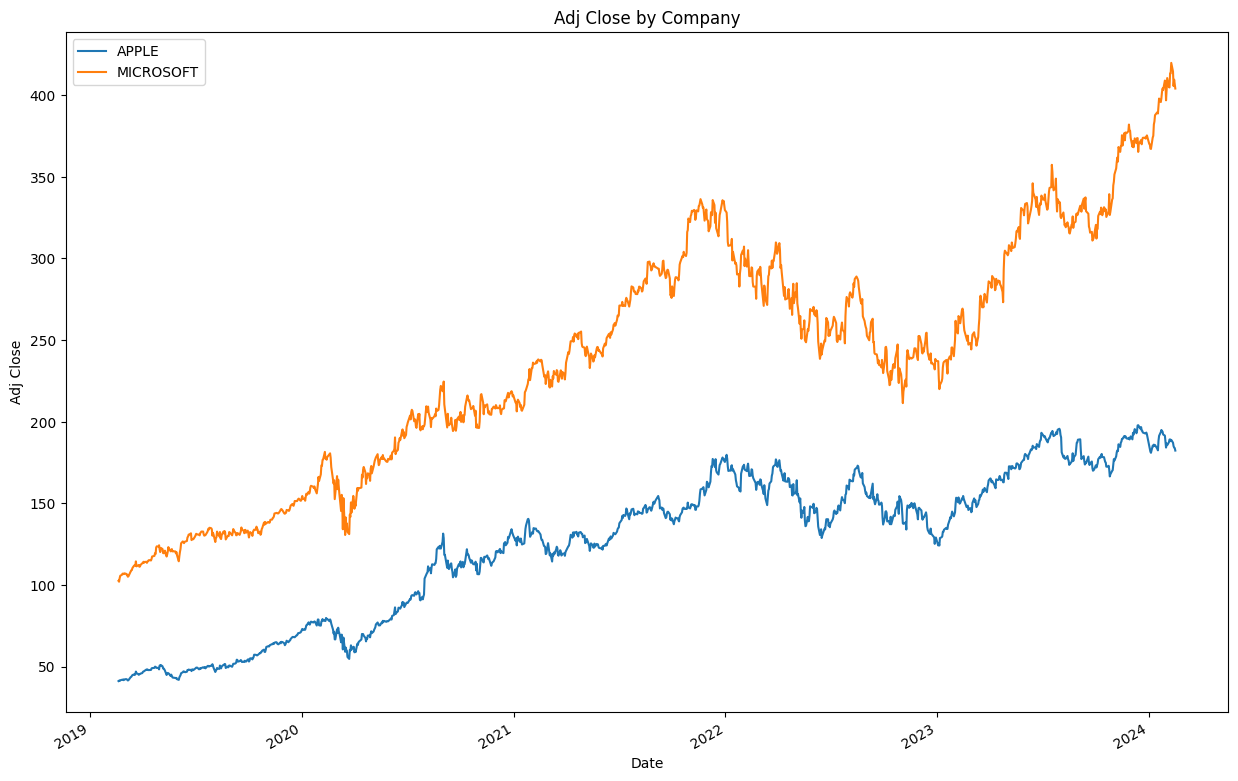

In [11]:
# Plot the time series of Microsoft and Apple stock prices on the same plot

# Plot column value (e.g. Adj Close, Volume) by company on same plot
def plot_col_by_company_group(df, col_name):
    fig, ax = plt.subplots()
    for name, group in df.groupby('company_name'):
        group.plot(ax=ax, y=col_name, label=name, title=f"{col_name} by Company",
                              xlabel="Date", ylabel=col_name, figsize=(15,10))

# plotting adjusted closing price for each company over time
plot_col_by_company_group(stocks_df, 'Adj Close')

**Enter answer here:** There is a general positive linear trend for the closing prices of each stock value. It seems that Microsoft stock is increasing in price at a greater rate than Apple's.

## (b)

In [12]:
# Downsample Microsoft stock data to weekly, monthly, quarterly, semi-annually and annually frequency

## YOUR CODE STARTS HERE

# resamples based on weekly data by taking average of all stock values
# for each day of the week
microsoft_stocks_weekly = microsoft_df.resample('W').mean()
# ...
microsoft_stocks_monthly = microsoft_df.resample('M').mean()
microsoft_stocks_quarterly = microsoft_df.resample('Q').mean()
microsoft_stocks_semi_annual = microsoft_df.resample('6M').mean()
microsoft_stocks_annual = microsoft_df.resample('A').mean()


<Axes: xlabel='Date', ylabel='Adj Close'>

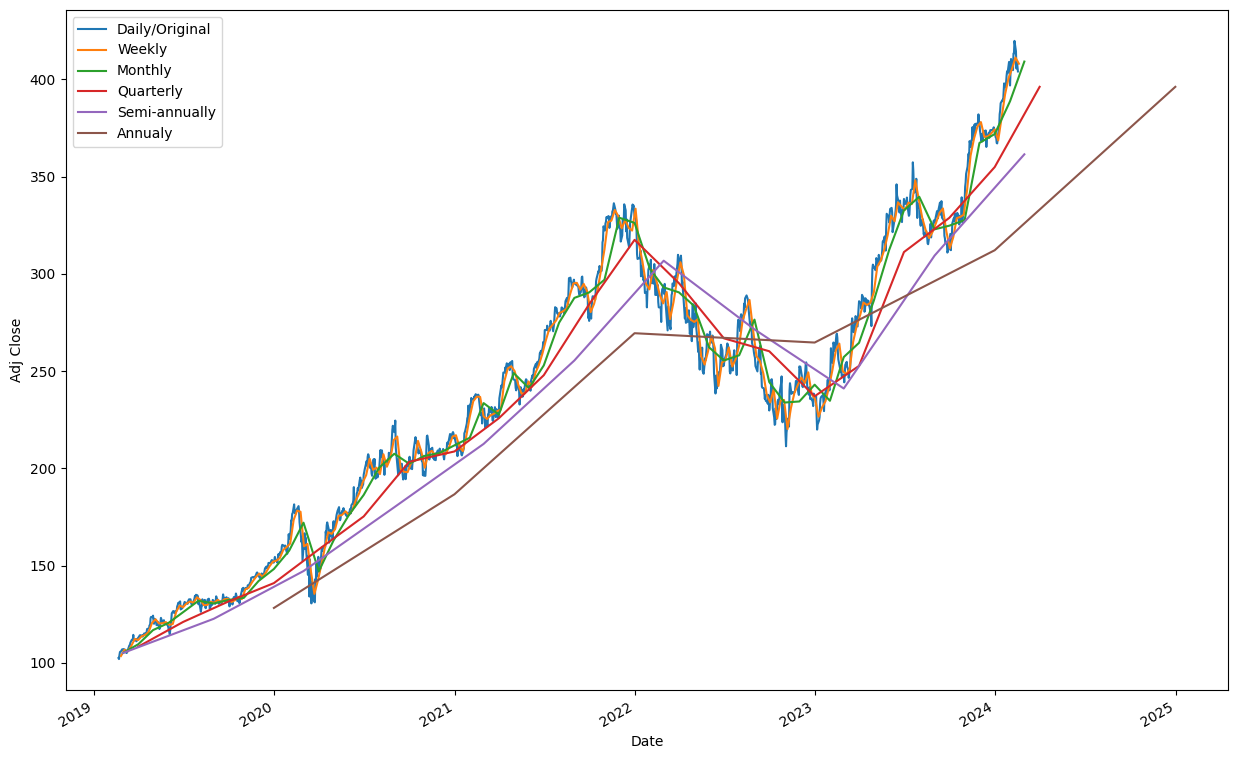

In [16]:
# Plot the daily, weekly, monthly, quarterly, semi-annually and annually stock prices for Microsoft on the same plot (use figsize=(15, 10))

## YOUR CODE STARTS HERE

# create a figure with 1x1 subplots and a figure size of 15 x 10
fig, ax = plt.subplots(1, 1, figsize=(15,10))

# plotting all resamples series data vs time
microsoft_df.plot(ax=ax, y='Adj Close', label='Daily/Original', xlabel="Date", ylabel="Adj Close")
microsoft_stocks_weekly.plot(ax=ax, y='Adj Close', label='Weekly', xlabel="Date", ylabel="Adj Close")
microsoft_stocks_monthly.plot(ax=ax, y='Adj Close', label='Monthly', xlabel="Date", ylabel="Adj Close")
microsoft_stocks_quarterly.plot(ax=ax, y='Adj Close', label='Quarterly', xlabel="Date", ylabel="Adj Close")
microsoft_stocks_semi_annual.plot(ax=ax, y='Adj Close', label='Semi-annually', xlabel="Date", ylabel="Adj Close")
microsoft_stocks_annual.plot(ax=ax, y='Adj Close', label='Annualy', xlabel="Date", ylabel="Adj Close")


In [19]:
# Downsample Apple stock data to weekly, monthly, quarterly, semi-annually and annually frequency

## YOUR CODE STARTS HERE

# resamples based on weekly data by taking average of all stock values
# for each day of the week
apple_stocks_weekly = apple_df.resample('W').mean()
# ...
apple_stocks_monthly = apple_df.resample('M').mean()
apple_stocks_quarterly = apple_df.resample('Q').mean()
apple_stocks_semi_annual = apple_df.resample('6M').mean()
apple_stocks_annual = apple_df.resample('A').mean()


<Axes: xlabel='Date', ylabel='Adj Close'>

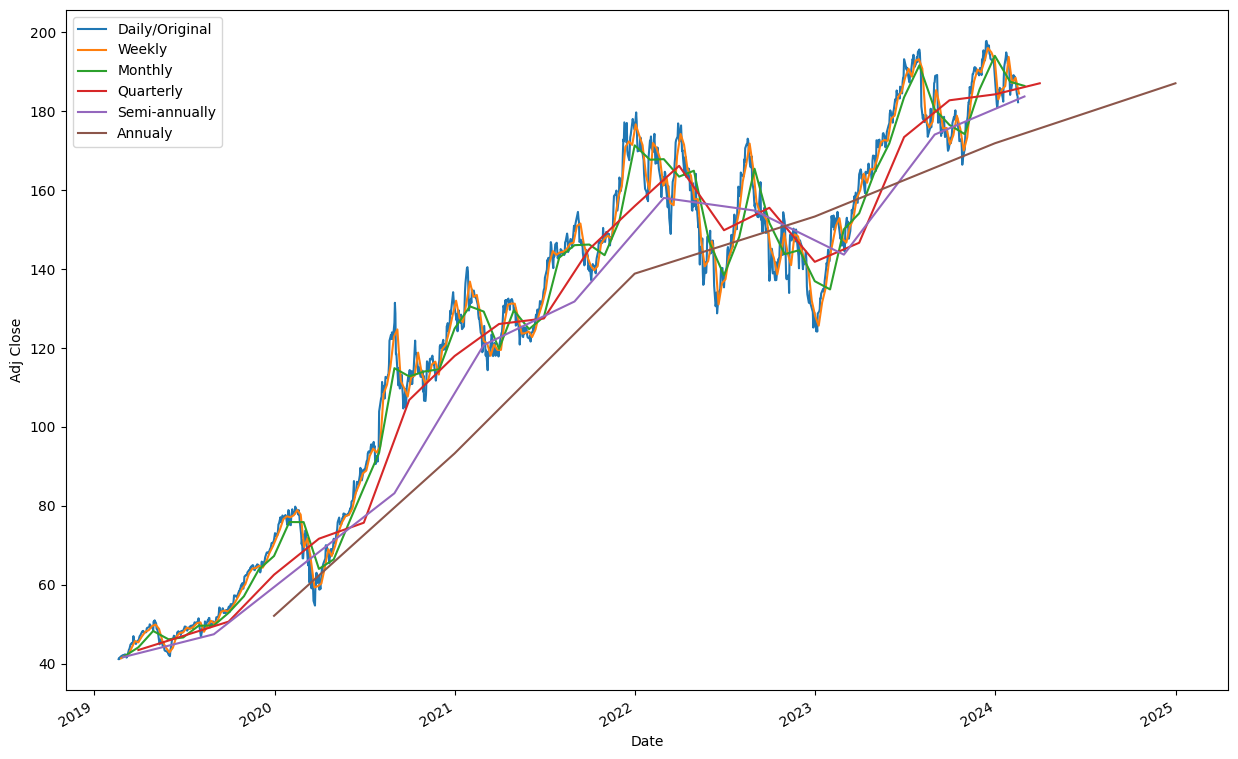

In [20]:
# Plot the daily, weekly, monthly, quarterly, semi-annually and annually stock prices for Apple on the same plot (use figsize=(15, 10))

## YOUR CODE STARTS HERE

# create a figure with 1x1 subplots and a figure size of 15 x 10
fig, ax = plt.subplots(1, 1, figsize=(15,10))

# plotting all resamples series data vs time
apple_df.plot(ax=ax, y='Adj Close', label='Daily/Original', xlabel="Date", ylabel="Adj Close")
apple_stocks_weekly.plot(ax=ax, y='Adj Close', label='Weekly', xlabel="Date", ylabel="Adj Close")
apple_stocks_monthly.plot(ax=ax, y='Adj Close', label='Monthly', xlabel="Date", ylabel="Adj Close")
apple_stocks_quarterly.plot(ax=ax, y='Adj Close', label='Quarterly', xlabel="Date", ylabel="Adj Close")
apple_stocks_semi_annual.plot(ax=ax, y='Adj Close', label='Semi-annually', xlabel="Date", ylabel="Adj Close")
apple_stocks_annual.plot(ax=ax, y='Adj Close', label='Annualy', xlabel="Date", ylabel="Adj Close")


## (c)

**Enter answer here:** Downsampling can be benifitial as it indirectly helps smoothe data which can help preserve/identify trends in the data. However, reducing the frequency of the time-scale too much, will lead to way too many data points to be removed. This loss of data may prevent trends in data from being revealed. From the plots it seems that a monthly time-scale is approproate for downsampling data.   

# Q2

## (a)

In [25]:
# Add a column to the monthly downsampled Microsoft dataframe (from Q1) called 'monthly_return'
# This column will contain the monthly return of the stock (use the pct_change() method)
# Then display the first 5 rows of the dataframe

## YOUR CODE STARTS HERE

# .pct_change() documentation found here : https://www.geeksforgeeks.org/python-
#                                                   pandas-dataframe-pct_change/

# creating a new modified df for microsoft monthly stock values
microsoft_modified = microsoft_stocks_monthly

# .pct_change() will calculate the monthly return rate values; these values are
# stored in the Adj_Close column of the dataframe

# adding a new column called monthly_return to modified df and setting its
# values to modified df's Adj_Close column

microsoft_modified['monthly_return'] = microsoft_modified.pct_change()['Adj Close']

microsoft_modified.head(5)



,Adj Close,monthly_return
Date,,
2019-02-28,105.111517,NaN
2019-03-31,109.594991,0.042654
2019-04-30,116.887392,0.066540
2019-05-31,120.511057,0.031001
2019-06-30,126.109168,0.046453


In [26]:
# Do the same for the monthly downsampled Apple dataframe

## YOUR CODE STARTS HERE

# creating a new modified df for microsoft monthly stock values
apple_modified = apple_stocks_monthly

# adding a new column called monthly_return to modified df and setting its
# values to modified df's Adj_Close column
apple_modified['monthly_return'] = apple_modified.pct_change()['Adj Close']

apple_modified.head(5)

,Adj Close,monthly_return
Date,,
2019-02-28,41.623787,NaN
2019-03-31,44.114187,0.059831
2019-04-30,48.259177,0.093960
2019-05-31,46.151073,-0.043683
2019-06-30,46.621609,0.010196


**Enter answer here:** The first monthly return rate is NaN becuase there is no previous data point to calculate the percent change with.

## (b)

<Axes: xlabel='Date', ylabel='Monthly Return'>

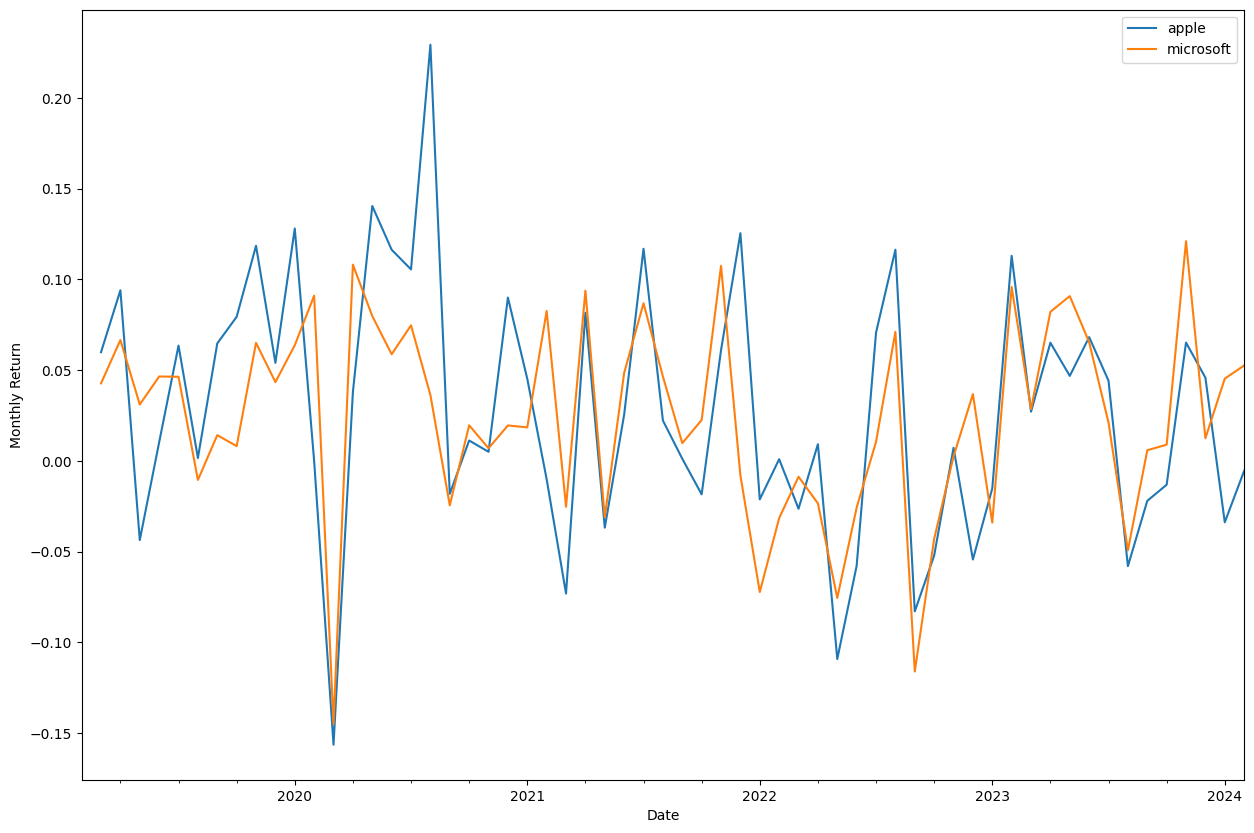

In [27]:
# Plot the monthly return of Microsoft and Apple stocks on the same plot

## YOUR CODE STARTS HERE

# creating a figure with 1x1 subplots and a figure size of 15 x 10
fig, ax = plt.subplots(1, 1, figsize=(15,10))

# plotting monthly return rate of each company over time

apple_modified.plot(ax=ax, y='monthly_return', label='apple', xlabel="Date",
                    ylabel="Monthly Return")

microsoft_modified.plot(ax=ax, y='monthly_return', label='microsoft',
                        xlabel="Date", ylabel="Monthly Return")

**Enter answer here:** From the plot it is clear that the monthly return rate fluctuates dramatically, and there seems to be no clear positive/negative trend in monthly return rate over time. This indicates that we should increase the time intervals of our time-scale to see if there is an quarterly or even annual trend in return rate, as a monthly time-scale may be too short a timeframe to identify any trend .


# Q3

## (a)

In [28]:
# Smooth the monthly stock prices of Microsoft using exponential smoothing with alpha = 0.1, 0.3, 0.5, 0.7, 0.9

## YOUR CODE STARTS HERE

# Apply exponential smoothing to microsoft stock data with alpha = 0.1
microsoft_smoothe_0_1 = microsoft_stocks_monthly.ewm(alpha=0.1, adjust=False).mean()

# ...
microsoft_smoothe_0_3 = microsoft_stocks_monthly.ewm(alpha=0.3, adjust=False).mean()
microsoft_smoothe_0_5 = microsoft_stocks_monthly.ewm(alpha=0.5, adjust=False).mean()
microsoft_smoothe_0_7 = microsoft_stocks_monthly.ewm(alpha=0.7, adjust=False).mean()
microsoft_smoothe_0_9 = microsoft_stocks_monthly.ewm(alpha=0.9, adjust=False).mean()



<Axes: xlabel='Date', ylabel='Adj Close'>

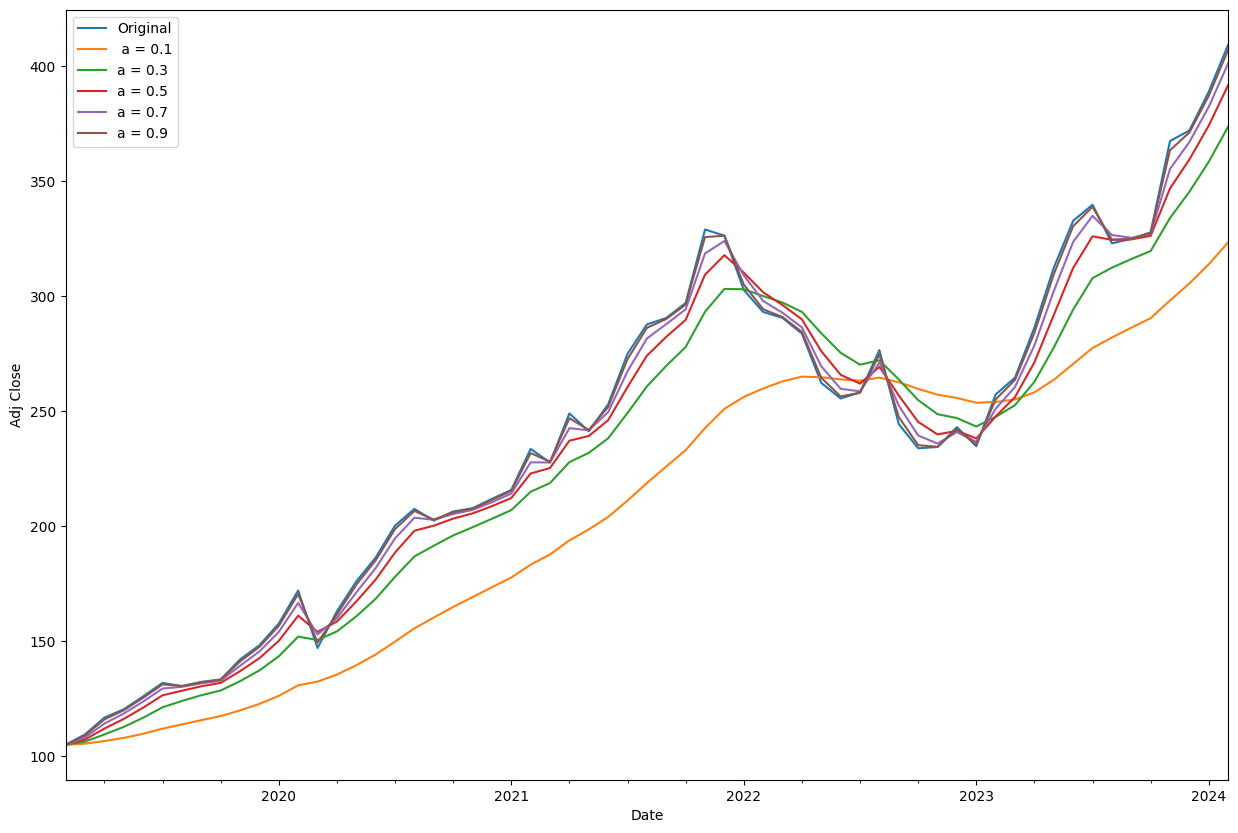

In [29]:
# Plot the monthly and smoothed monthly stock prices of Microsoft on the same plot (6 lines)

## YOUR CODE STARTS HERE

# Creating a 1x1 subplot with a figure size of 15 x 10
fig, ax = plt.subplots(1, 1, figsize=(15,10))

# plotting monthly series data (with different levels of exp smoothing) over time
microsoft_stocks_monthly.plot(ax=ax, y='Adj Close', label='Original', xlabel="Date", ylabel="Adj Close")
microsoft_smoothe_0_1.plot(ax=ax, y='Adj Close', label=' a = 0.1', xlabel="Date", ylabel="Adj Close")
microsoft_smoothe_0_3.plot(ax=ax, y='Adj Close', label='a = 0.3', xlabel="Date", ylabel="Adj Close")
microsoft_smoothe_0_5.plot(ax=ax, y='Adj Close', label='a = 0.5', xlabel="Date", ylabel="Adj Close")
microsoft_smoothe_0_7.plot(ax=ax, y='Adj Close', label='a = 0.7', xlabel="Date", ylabel="Adj Close")
microsoft_smoothe_0_9.plot(ax=ax, y='Adj Close', label='a = 0.9', xlabel="Date", ylabel="Adj Close")

In [30]:
# Smooth the monthly stock prices of Apple using exponential smoothing with alpha = 0.1, 0.3, 0.5, 0.7, 0.9

## YOUR CODE STARTS HERE

# Apply exponential smoothing to microsoft stock data with alpha = 0.1
apple_smoothe_0_1 = apple_stocks_monthly.ewm(alpha=0.1, adjust=False).mean()

# adjust = False is necessary for recursive behavior of exponential smoothing
#          function

# ...
apple_smoothe_0_3 = apple_stocks_monthly.ewm(alpha=0.3, adjust=False).mean()
apple_smoothe_0_5 = apple_stocks_monthly.ewm(alpha=0.5, adjust=False).mean()
apple_smoothe_0_7 = apple_stocks_monthly.ewm(alpha=0.7, adjust=False).mean()
apple_smoothe_0_9 = apple_stocks_monthly.ewm(alpha=0.9, adjust=False).mean()


<Axes: xlabel='Date', ylabel='Adj Close'>

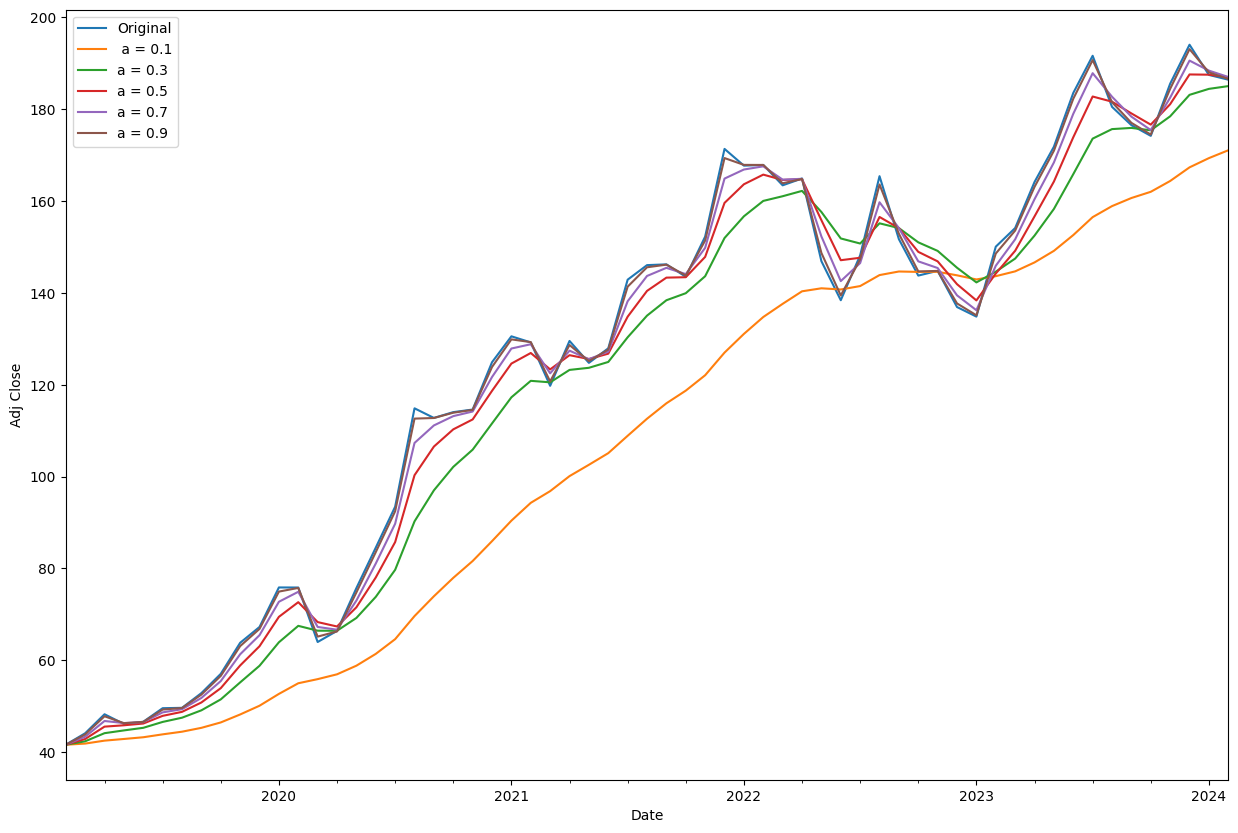

In [31]:
# Plot the monthly and smoothed monthly stock prices of Apple on the same plot (6 lines)

## YOUR CODE STARTS HERE
# Creating a 1x1 subplot with a figure size of 15 x 10
fig, ax = plt.subplots(1, 1, figsize=(15,10))

# plotting monthly series data (with different levels of exp smoothing) over time
apple_stocks_monthly.plot(ax=ax, y='Adj Close', label='Original', xlabel="Date", ylabel="Adj Close")
apple_smoothe_0_1.plot(ax=ax, y='Adj Close', label=' a = 0.1', xlabel="Date", ylabel="Adj Close")
apple_smoothe_0_3.plot(ax=ax, y='Adj Close', label='a = 0.3', xlabel="Date", ylabel="Adj Close")
apple_smoothe_0_5.plot(ax=ax, y='Adj Close', label='a = 0.5', xlabel="Date", ylabel="Adj Close")
apple_smoothe_0_7.plot(ax=ax, y='Adj Close', label='a = 0.7', xlabel="Date", ylabel="Adj Close")
apple_smoothe_0_9.plot(ax=ax, y='Adj Close', label='a = 0.9', xlabel="Date", ylabel="Adj Close")


## (b)

**Enter your answer here:** As alpha decreases, the time series data beings smoothing more

# Q4

## (a)

<Axes: title={'center': 'Edmonton Temperature'}, xlabel='Date', ylabel='Temperature'>

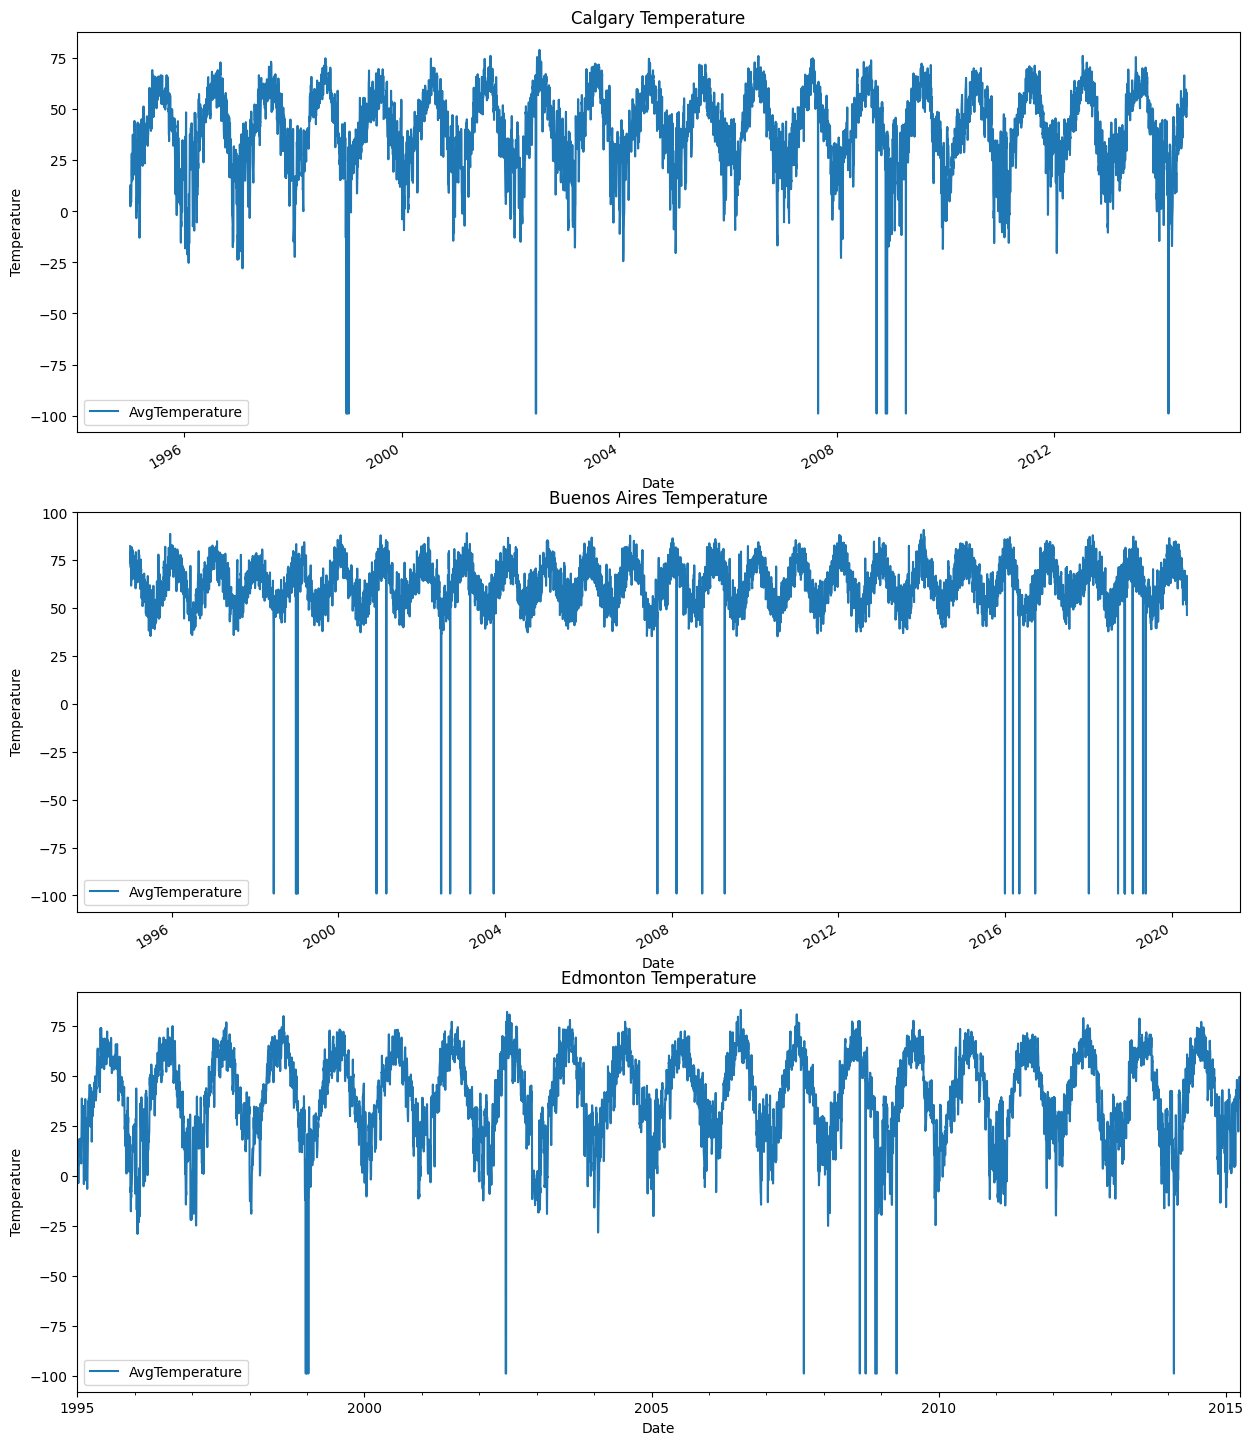

In [34]:
# Plot temperature data for each city in different subplots

## YOUR CODE STARTS HERE

# Creating 3x1 subplots with figure size of 15 x 20
fig, ax = plt.subplots(3, 1, figsize=(15,20))
city_1_df.plot(ax=ax[0], title=f"{city_1} Temperature", xlabel="Date", ylabel="Temperature")
city_2_df.plot(ax=ax[1], title=f"{city_2} Temperature", xlabel="Date", ylabel="Temperature")
city_3_df.plot(ax=ax[2], title=f"{city_3} Temperature", xlabel="Date", ylabel="Temperature")



**Enter answer here:** This data visualization is too noisy to reveal useful trends/analysis. This data visualization compares 3 time-series data that have different time ranges (e.g. Edmonton data is between 1995 to 2015 while Buenos Aires data is between 1996 and 2020 etc.) making it hard to compare between the time-series data.

## (b)

In [35]:
# Remove entries that aren't in intersection of all three indices (which are dates)

## YOUR CODE STARTS HERE

# Remove entries that aren't in intersection of all three indices (which are dates)
index_intersection = city_1_df.index.intersection(city_2_df.index).intersection(city_3_df.index)
city_1_df = city_1_df.loc[index_intersection]
city_2_df = city_2_df.loc[index_intersection]
city_3_df = city_3_df.loc[index_intersection]

In [36]:
# Downsample the data to monthly

## YOUR CODE STARTS HERE

# Downsample the data to monthly
city_1_monthly = city_1_df.resample('M').mean()
city_2_monthly = city_2_df.resample('M').mean()
city_3_monthly = city_3_df.resample('M').mean()


In [37]:
# Apply exponential smoothing to temperature data with alpha = 0.3

## YOUR CODE STARTS HERE

# Apply exponential smoothing to temperature data with alpha = 0.3
# adjust = False is necessary for recursive behavior of exponential smoothing
#          function
city_1_monthly = city_1_monthly.ewm(alpha=0.3, adjust=False).mean()
city_2_monthly = city_2_monthly.ewm(alpha=0.3, adjust=False).mean()
city_3_monthly = city_3_monthly.ewm(alpha=0.3, adjust=False).mean()

<Axes: title={'center': 'Edmonton Monthly Temperature'}, xlabel='Date', ylabel='AvgTemperature'>

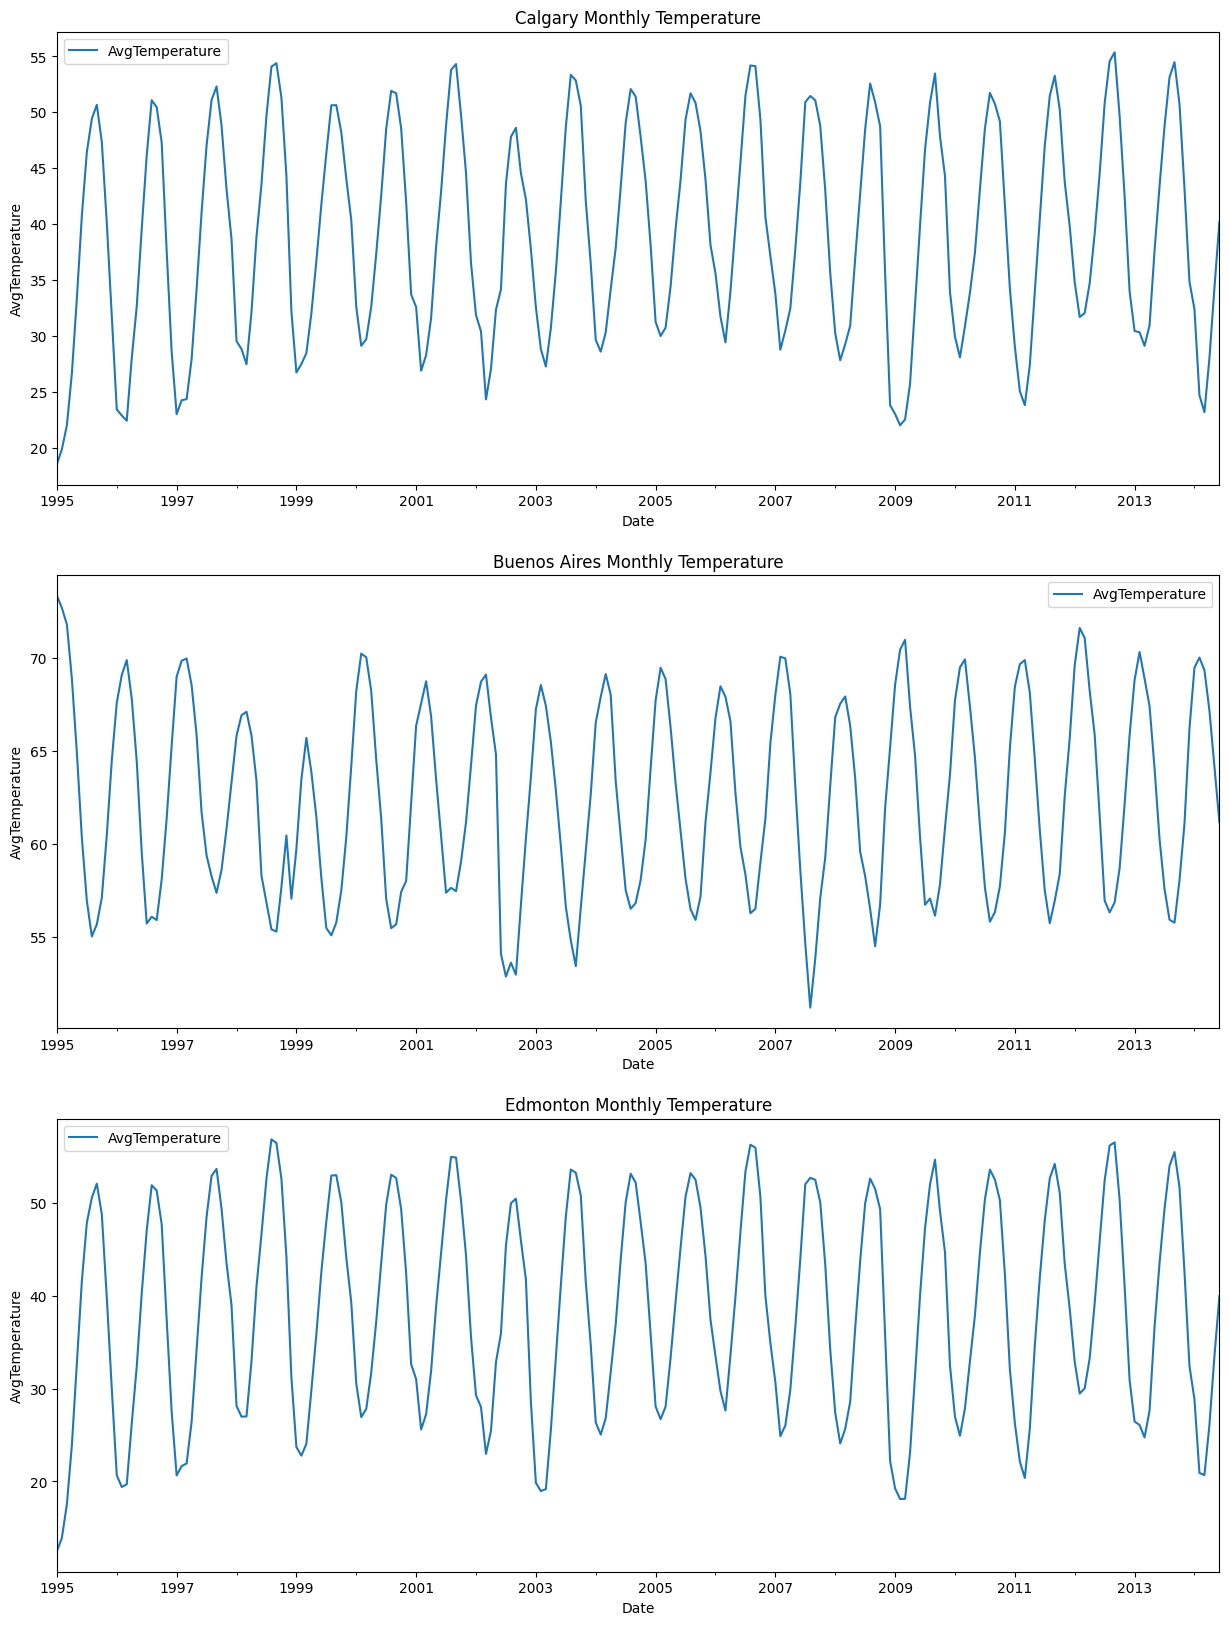

In [39]:
# Plot monthly smoothed temperature data for cities in different subplots

## YOUR CODE STARTS HERE

# Plot monthly temperature data for cities in different subplots
fig, ax = plt.subplots(3, 1, figsize=(15,20))

city_1_monthly.plot(ax=ax[0], y='AvgTemperature',
  title=f"{city_1} Monthly Temperature", xlabel="Date", ylabel="AvgTemperature")

city_2_monthly.plot(ax=ax[1], y='AvgTemperature',
  title=f"{city_2} Monthly Temperature", xlabel="Date", ylabel="AvgTemperature")

city_3_monthly.plot(ax=ax[2], y='AvgTemperature',
  title=f"{city_3} Monthly Temperature", xlabel="Date", ylabel="AvgTemperature")

**Enter answer here:** Each plot exhibits Seasonality (due to the Sine-wave-like/periodic behavior of the time-series data). I would expect City 1 and City 3 (Calgary and Edmonton) to be close to each other because both cities have roughly the same monthly temperature over the entire time range.

## (c)

Text(0, 0.5, 'Correlation')

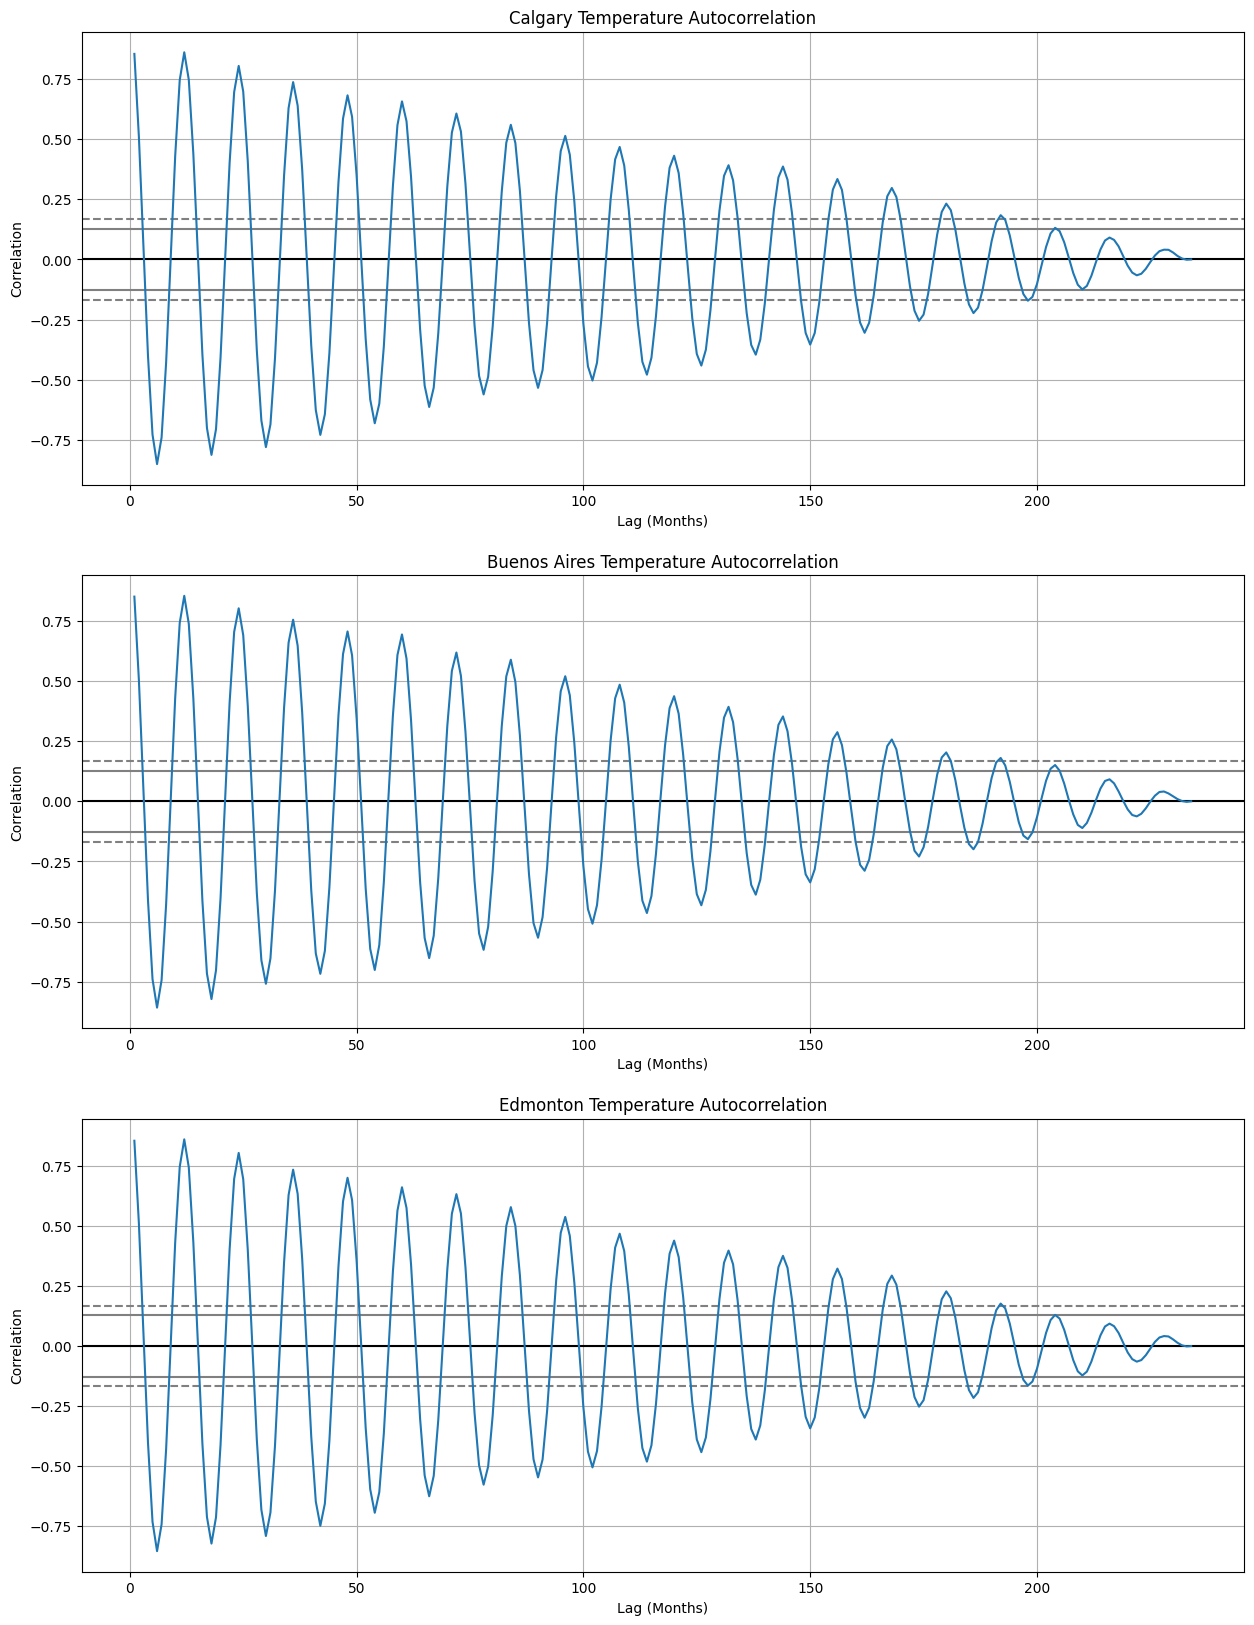

In [40]:
# Plot auto-correlation of the monthly smoothed temperature of cities in different subplots
# Hint: use pd.plotting.autocorrelation_plot()

## YOUR CODE STARTS HERE


# Plot auto-correlation for temperature of cities in different subplots

  # creating figure with 3x1 subplots with figure size of 15x20
fig, ax = plt.subplots(3, 1, figsize=(15,20))

pd.plotting.autocorrelation_plot(city_1_monthly['AvgTemperature'], ax=ax[0])
ax[0].set_title(f"{city_1} Temperature Autocorrelation")
ax[0].set_xlabel("Lag (Months)")
ax[0].set_ylabel("Correlation")

pd.plotting.autocorrelation_plot(city_2_monthly['AvgTemperature'], ax=ax[1])
ax[1].set_title(f"{city_2} Temperature Autocorrelation")
ax[1].set_xlabel("Lag (Months)")
ax[1].set_ylabel("Correlation")

pd.plotting.autocorrelation_plot(city_3_monthly['AvgTemperature'], ax=ax[2])
ax[2].set_title(f"{city_3} Temperature Autocorrelation")
ax[2].set_xlabel("Lag (Months)")
ax[2].set_ylabel("Correlation")



**Enter answer here:** The periodic behavior in the autocorrelation plots confirm the seasonal behavior of the time series data for each cities temperature. As lag increases, the amplitude of the peaks in the plot decreases, indicating that there is also a long-term trend in the data as well (perhaps from climate change etc.)

## (d)

Text(0, 0.5, 'Correlation')

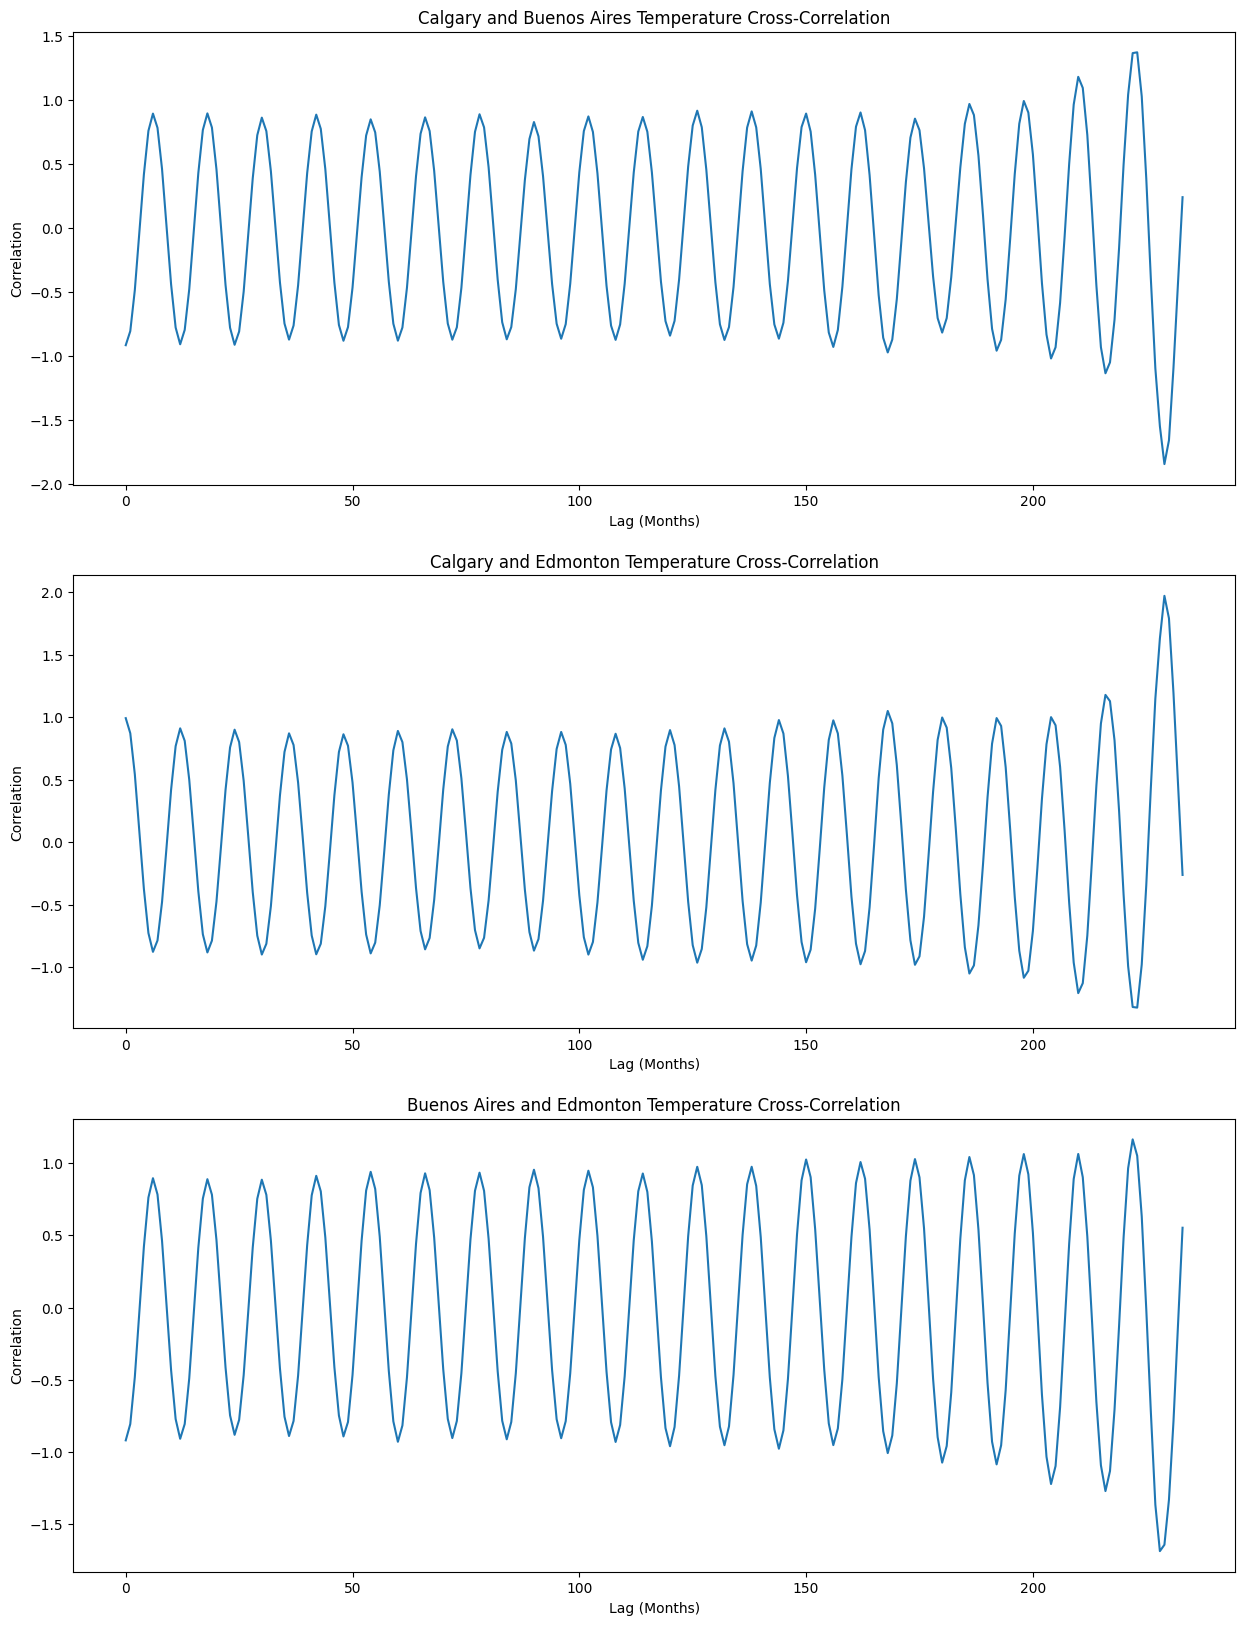

In [42]:
# Plot cross-correlation between city pairs (Calgary and Buenos Aires, Calgary and Edmonton, Buenos Aires and Edmonton)
# Hint: use ccf() function from statsmodels.tsa.stattools

## YOUR CODE STARTS HERE

# Plot cross-correlation between city temperature pairs

  # plotting a figure with 3x1 subplots and a figsize of 15 x 20
fig, ax = plt.subplots(3, 1, figsize=(15,20))

  # calculating cross correlation between city i and j
  # city i will lag, city j will remain as it is
ccf_12 = ccf(city_1_monthly['AvgTemperature'], city_2_monthly['AvgTemperature'])
ccf_13 = ccf(city_1_monthly['AvgTemperature'], city_3_monthly['AvgTemperature'])
ccf_23 = ccf(city_2_monthly['AvgTemperature'], city_3_monthly['AvgTemperature'])

  # plotting each cross-correlation plot
ax[0].plot(ccf_12)
ax[0].set_title(f"{city_1} and {city_2} Temperature Cross-Correlation")
ax[0].set_xlabel("Lag (Months)")
ax[0].set_ylabel("Correlation")

ax[1].plot(ccf_13)
ax[1].set_title(f"{city_1} and {city_3} Temperature Cross-Correlation")
ax[1].set_xlabel("Lag (Months)")
ax[1].set_ylabel("Correlation")

ax[2].plot(ccf_23)
ax[2].set_title(f"{city_2} and {city_3} Temperature Cross-Correlation")
ax[2].set_xlabel("Lag (Months)")
ax[2].set_ylabel("Correlation")




**Enter answer here:** From the cross-correlation plots, edmonton and calgary have the same seasons (at time lag = 0, correlation = 1, at time lag = 12, correlation = 1 again) and edmonton/calgary and buenos aires have opposite seasons (at time lag = 0, correlation approximates to -1 and at time lag = 6, correlation approximates to 1 ). Therefore when it is summer in Edmonton, it is also summer in Calgary and winter in Buenos Aires.